In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing

In [ ]:
df = pd.read_csv("/content/btc_1h.csv")
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


In [ ]:
df.tail()

,datetime,open,high,low,close,volume
35659,2022-01-31 01:30:00,37512.37,37740.00,37351.63,37684.45,1037.92256
35660,2022-01-31 02:30:00,37684.45,37762.60,37492.25,37729.00,874.06052
35661,2022-01-31 03:30:00,37729.00,37855.54,37625.41,37785.78,734.65855
35662,2022-01-31 04:30:00,37785.78,38230.00,37778.46,37881.76,1728.81180
35663,2022-01-31 05:30:00,37881.75,37951.07,36828.32,36829.30,2907.71096


In [ ]:
df.shape

(35664, 6)

In [ ]:
df.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

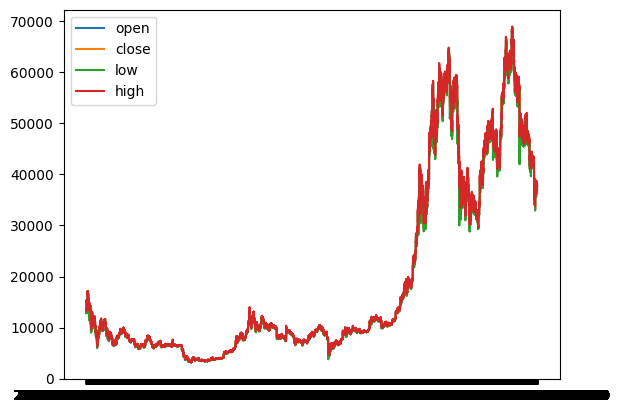

In [ ]:
fig,ax = plt.subplots()
ax.plot(df.datetime, df.open, label= "open")
ax.plot(df.datetime, df.close, label= "close")
ax.plot(df.datetime, df.low, label="low")
ax.plot(df.datetime, df.high, label= "high")

ax.legend()
plt.show()


## Extracting Features

In [ ]:
df_main = pd.DataFrame()
df_main = df.copy()
df_main["NormalisedValues"]= (df.close - df.low)/(df.high- df.low)
df_main["volume"] = df.volume

df_main

,datetime,open,high,low,close,volume,NormalisedValues
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,0.408693
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,0.108238
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,0.595980
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,0.373611
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,0.926014
...,...,...,...,...,...,...,...
35659,2022-01-31 01:30:00,37512.37,37740.00,37351.63,37684.45,1037.922560,0.856966
35660,2022-01-31 02:30:00,37684.45,37762.60,37492.25,37729.00,874.060520,0.875717
35661,2022-01-31 03:30:00,37729.00,37855.54,37625.41,37785.78,734.658550,0.696867
35662,2022-01-31 04:30:00,37785.78,38230.00,37778.46,37881.76,1728.811800,0.228773


In [ ]:
from scipy.signal import find_peaks

In [ ]:
prices = df_main["close"].values

minima_indices, _ = find_peaks(-prices)
maxima_indices, _  = find_peaks(prices)

df_main['target'] = np.nan

df_main.loc[minima_indices, "target" ] = 0
df_main.loc[maxima_indices,"target" ] = 1

df_main['target'].fillna(-1,inplace = True)

df_main


,datetime,open,high,low,close,volume,NormalisedValues,target
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,0.408693,-1.0
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,0.108238,0.0
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,0.595980,-1.0
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,0.373611,-1.0
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,0.926014,1.0
...,...,...,...,...,...,...,...,...
35659,2022-01-31 01:30:00,37512.37,37740.00,37351.63,37684.45,1037.922560,0.856966,-1.0
35660,2022-01-31 02:30:00,37684.45,37762.60,37492.25,37729.00,874.060520,0.875717,-1.0
35661,2022-01-31 03:30:00,37729.00,37855.54,37625.41,37785.78,734.658550,0.696867,-1.0
35662,2022-01-31 04:30:00,37785.78,38230.00,37778.46,37881.76,1728.811800,0.228773,1.0


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()
y=df["close"].iloc[0:5].values.reshape(-1,1)
x=df["close"].index[1:6].values.reshape(-1,1)
model.fit(x,y)

print(x)
print(y)
model.coef_[0][0], type(x)


[[1]
 [2]
 [3]
 [4]
 [5]]
[[13529.01]
 [13203.06]
 [13330.18]
 [13410.03]
 [13601.01]]


(35.097000000000115, numpy.ndarray)

In [ ]:
def reg_coefficient(n, ind):
  model = LinearRegression()
  x = df_main["close"].index[ind - n : ind].values.reshape(-1,1)
  y = df_main["close"].iloc[ind - n : ind].values.reshape(-1,1)
  model.fit(x,y)
  return model.coef_[0][0]


In [ ]:
df_main["3_reg"] = df_main.apply(lambda row : reg_coefficient(3,row.name) if row.name >= 3 else None, axis = 1)
df_main.head()

,datetime,open,high,low,close,volume,NormalisedValues,target,3_reg
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,0.408693,-1.0,NaN
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,0.108238,0.0,NaN
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,0.595980,-1.0,NaN
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,0.373611,-1.0,-99.415
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,0.926014,1.0,103.485


In [ ]:
df_main["5_reg"] = df_main.apply(lambda row : reg_coefficient(5,row.name) if row.name >= 5 else None, axis = 1)
df_main["10_reg"] = df_main.apply(lambda row : reg_coefficient(10,row.name) if row.name >= 10 else None, axis = 1)
df_main["20_reg"] = df_main.apply(lambda row : reg_coefficient(20,row.name) if row.name >= 20 else None, axis = 1)
df_main.head()


,datetime,open,high,low,close,volume,NormalisedValues,target,3_reg,5_reg,10_reg,20_reg
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199,0.408693,-1.0,NaN,NaN,NaN,NaN
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006,0.108238,0.0,NaN,NaN,NaN,NaN
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572,0.595980,-1.0,NaN,NaN,NaN,NaN
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030,0.373611,-1.0,-99.415,NaN,NaN,NaN
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329,0.926014,1.0,103.485,NaN,NaN,NaN


In [ ]:
df_main.shape

(35664, 12)

In [ ]:
X_backtest = df_main[30000:]
X_backtest.shape

(5664, 12)

In [ ]:
df_final = df_main[df_main['target'] != -1].copy()
df_final.drop(columns = ["datetime", "open", "high","low","close"],inplace = True)
df_final.head()

,volume,NormalisedValues,target,3_reg,5_reg,10_reg,20_reg
1,383.697006,0.108238,0.0,NaN,NaN,NaN,NaN
4,340.807329,0.926014,1.0,103.485,NaN,NaN,NaN
5,404.229046,0.188348,0.0,135.415,35.097,NaN,NaN
6,264.989684,0.932448,1.0,74.480,98.269,NaN,NaN
8,271.813553,0.298264,0.0,5.680,50.004,NaN,NaN


In [ ]:
df_final.shape

(19294, 7)

In [ ]:
df_final.target.unique()

array([0., 1.])

In [ ]:
df_final = df_final[9:]
df_final

,volume,NormalisedValues,target,3_reg,5_reg,10_reg,20_reg
21,326.923135,0.501326,1.0,132.120,98.085,11.373333,-20.161158
23,345.218495,0.172357,0.0,26.380,87.464,44.506970,-19.354143
24,466.596114,0.786273,1.0,-50.505,33.202,39.422000,-18.314226
28,992.418927,0.401628,0.0,-123.110,-28.045,34.419576,9.448805
31,665.584380,0.919135,1.0,64.335,-71.887,-39.701576,14.576271
...,...,...,...,...,...,...,...
35654,739.667100,0.767292,1.0,-49.740,-83.830,-27.623394,-7.501835
35655,586.328870,0.118067,0.0,8.435,-35.934,-24.359758,-11.584699
35656,554.763210,0.984084,1.0,-3.275,-19.519,-29.944182,-10.278015
35658,1718.812040,0.181608,0.0,-5.745,-2.517,-20.364970,-6.354278


In [ ]:
train_size = int(0.7*df_final.shape[0])
valid_size = int(0.15*df_final.shape[0])
test_size = df_final.shape[0]-train_size-valid_size
train_size, valid_size, test_size

(13499, 2892, 2894)

### Train-test split

In [ ]:
from sklearn.linear_model import LogisticRegression
X = df_final.drop(columns = ["target"])
y = df_final["target"]

X_trainV, X_test =  X[ : train_size + valid_size], X[train_size + valid_size : train_size + valid_size + test_size ]
y_trainV, y_test =  y[: train_size + valid_size], y[train_size + valid_size : train_size + valid_size + test_size ]



In [ ]:
len(X_trainV), len(y_trainV), len(X_test), len(y_test)

(16391, 16391, 2894, 2894)

# Using Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Type of penalty (L1 or L2)
}

model = LogisticRegression(max_iter = 1000)

tscv = TimeSeriesSplit(n_splits=5)

# Create GridSearchCV with your parameters and the specified splitter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_trainV, y_trainV)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using the last split of TimeSeriesSplit as a test set
# Note: You may need to adapt this based on your specific use case
train_index, test_index = list(tscv.split(X_trainV))[-1]
X_valid, y_valid = X_trainV.iloc[test_index], y_trainV.iloc[test_index]

# Evaluate the best model on the test set
y_pred = best_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Best hyperparameters:", best_params)
print("Test accuracy:", accuracy)

print("Cross-validated results:")
print(cv_results_df[['params', 'mean_test_score']])

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Test accuracy: 0.8553643354082754
Cross-validated results:
                          params  mean_test_score
0  {'C': 0.001, 'penalty': 'l2'}         0.754156
1   {'C': 0.01, 'penalty': 'l2'}         0.825778
2    {'C': 0.1, 'penalty': 'l2'}         0.829367
3      {'C': 1, 'penalty': 'l2'}         0.829440
4     {'C': 10, 'penalty': 'l2'}         0.829293
5    {'C': 100, 'penalty': 'l2'}         0.829147


In [ ]:
model_1 = best_model
# test accuracy = 0.855/ mean_test_score = 0.829

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# y_pred = model_2.predict(X_train)
# accuracy_score(y_pred, y_train)

0.8204131017198167

In [ ]:
# valid_pred = model_2.predict(X_valid)
# accuracy_score(valid_pred, y_valid)

0.8431423386051335

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
cm

array([[1168,  197],
       [ 198, 1168]])

In [ ]:
y_pred_prob = model_1.predict_proba(X_valid)[:, 1]

# Change threshold to 0.3 (adjust as needed)
threshold = 0.3
y_pred_custom_threshold = (y_pred_prob >= threshold).astype(int)

print(accuracy_score( y_valid,y_pred_custom_threshold))
cm2 = confusion_matrix( y_valid,y_pred_custom_threshold)
cm2,

0.8319296960820213


(array([[1000,  365],
        [  94, 1272]]),)

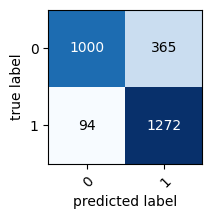

In [ ]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(
    conf_mat = cm2,
    class_names = np.array([0,1]),
    figsize = (5,2)
)

# Using Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Assuming you have your feature matrix X and target variable y

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

# Instantiate the model you want to use
model = DecisionTreeClassifier()

# Use TimeSeriesSplit as the cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Create GridSearchCV with your parameters and the specified splitter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_trainV, y_trainV)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Get the best parameters and model
best_params = grid_search.best_params_
model_2 = grid_search.best_estimator_

# Reset the index of your DataFrame before selecting the test set
X_trainV.reset_index(drop=True, inplace=True)
y_trainV.reset_index(drop=True, inplace=True)

# Evaluate the best model using the last split of TimeSeriesSplit as a test set
# Note: You may need to adapt this based on your specific use case
train_index, test_index = list(tscv.split(X_trainV))[-1]
X_valid, y_valid = X_trainV.loc[test_index], y_trainV.loc[test_index]

# Evaluate the best model on the test set
y_pred = model_2.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Best hyperparameters:", best_params)
print("Test accuracy:", accuracy)

print("Cross-validated results:")
print(cv_results_df[['params', 'mean_test_score']])

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Test accuracy: 0.8619553277187844
Cross-validated results:
                                               params  mean_test_score
0   {'max_depth': None, 'max_features': 'sqrt', 'm...         0.741780
1   {'max_depth': None, 'max_features': 'sqrt', 'm...         0.745368
2   {'max_depth': None, 'max_features': 'sqrt', 'm...         0.758623
3   {'max_depth': None, 'max_features': 'sqrt', 'm...         0.748371
4   {'max_depth': None, 'max_features': 'sqrt', 'm...         0.744709
..                                                ...              ...
67  {'max_depth': 15, 'max_features': 'log2', 'min...         0.762651
68  {'max_depth': 15, 'max_features': 'log2', 'min...         0.763017
69  {'max_depth': 15, 'max_features': 'log2', 'min...         0.779934
70  {'max_depth': 15, 'max_features': 'log2', 'min...         0.759868
71  {'max_depth': 15, 'max_features': 'log2', 'min

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
cm

array([[1165,  200],
       [ 177, 1189]])

In [ ]:
y_pred_prob = model_3.predict_proba(X_valid)[:, 1]

# Change threshold to 0.3 (adjust as needed)
threshold = 0.3
y_pred_custom_threshold = (y_pred_prob >= threshold).astype(int)

print(accuracy_score( y_valid,y_pred_custom_threshold))
cm2 = confusion_matrix( y_valid,y_pred_custom_threshold)
cm2

0.8960087879897474


array([[1106,  259],
       [  25, 1341]])

# Using Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Assuming you have your feature matrix X and target variable y

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

#Instantiate the model you want to use
model = RandomForestClassifier()

#Use TimeSeriesSplit as the cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Create GridSearchCV with your parameters and the specified splitter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_trainV, y_trainV)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Get the best parameters and model
best_params = grid_search.best_params_
model_3 = grid_search.best_estimator_

# Reset the index of your DataFrame before selecting the test set
X_trainV.reset_index(drop=True, inplace=True)
y_trainV.reset_index(drop=True, inplace=True)

# Evaluate the best model using the last split of TimeSeriesSplit as a test set
# Note: You may need to adapt this based on your specific use case
train_index, test_index = list(tscv.split(X_trainV))[-1]
X_valid, y_valid = X_trainV.loc[test_index], y_trainV.loc[test_index]

# Evaluate the best model on the test set
y_pred = model_3.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print("Best hyperparameters:", best_params)
print("Test accuracy:", accuracy)

print("Cross-validated results:")
print(cv_results_df[['params', 'mean_test_score']])


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Test accuracy: 0.9198095935554742
Cross-validated results:
                                               params  mean_test_score
0   {'max_depth': None, 'min_samples_split': 2, 'n...         0.815818
1   {'max_depth': None, 'min_samples_split': 2, 'n...         0.821018
2   {'max_depth': None, 'min_samples_split': 2, 'n...         0.821164
3   {'max_depth': None, 'min_samples_split': 5, 'n...         0.821311
4   {'max_depth': None, 'min_samples_split': 5, 'n...         0.819993
5   {'max_depth': None, 'min_samples_split': 5, 'n...         0.821384
6   {'max_depth': None, 'min_samples_split': 10, '...         0.823215
7   {'max_depth': None, 'min_samples_split': 10, '...         0.823288
8   {'max_depth': None, 'min_samples_split': 10, '...         0.823508
9   {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.829293
10  {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.827243
11  {

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
cm

array([[1251,  114],
       [ 105, 1261]])

In [ ]:
y_pred_prob = model_3.predict_proba(X_valid)[:, 1]

# Change threshold to 0.3 (adjust as needed)
threshold = 0.3
y_pred_custom_threshold = (y_pred_prob >= threshold).astype(int)

print(accuracy_score( y_valid,y_pred_custom_threshold))
cm2 = confusion_matrix( y_valid,y_pred_custom_threshold)
cm2,

0.8960087879897474


(array([[1106,  259],
        [  25, 1341]]),)

In [ ]:
# Using the best accuracy model
#max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 10,  min_samples_split = 2, n_estimators = 50, random_state = 42)
features = X_test.columns
model.fit(X_trainV,y_trainV)
features

Index(['volume', 'NormalisedValues', '3_reg', '5_reg', '10_reg', '20_reg'], dtype='object')

In [ ]:
model.feature_names_in_

array(['volume', 'NormalisedValues', '3_reg', '5_reg', '10_reg', '20_reg'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test);
print(accuracy_score(y_test,y_test_pred))


0.8521078092605391
